In [1]:

import SciServer.CasJobs as CasJobs 
import SciServer.SciDrive as SciDrive   
import SciServer.SkyServer as SkyServer   
print('SciServer libraries imported')


import numpy as np                  
from scipy.misc import imsave       
import pandas                       
import matplotlib.pyplot as plt     
import os                           
print('Supporting libraries imported')

from astropy.io import ascii

pandas.set_option('display.max_colwidth', -1)

import warnings
warnings.filterwarnings('ignore')
print('Settings applied')

SciServer libraries imported
Supporting libraries imported
Settings applied


In [110]:

# For the database schema and documentation see http://skyserver.sdss.org/dr14
#
# This query finds all galaxies with a size (petror90_r) greater than 10 arcseconds, within
# a region of sky with 100 < RA < 250, a redshift between 0.02 and 0.5, and a g-band magnitude brighter than 17.
#

query="""
SELECT p.objId,p.ra,p.dec,p.petror90_r, p.expAB_r,
    p.dered_u as u, p.dered_g as g, p.dered_r as r, p.dered_i as i, 
    s.z, s.plate, s.mjd, s.fiberid, p.g as mag, n.sersic_n
FROM galaxy AS p
   JOIN SpecObj AS s ON s.bestobjid = p.objid
   JOIN nsatlas AS n ON n.mjd = s.mjd and n.fiberID = s.fiberID and n.plate = s.plate
WHERE p.petror90_r > 10
  and p.ra between 0 and 360
  and s.z between 0.02 and .1
  and p.g < 17
"""
#Then, query the database. The answer is a table that is being returned to a dataframe that we've named all_gals.
newgals = CasJobs.executeQuery(query, "dr14")

print("SQL query finished.")
print("SQL query returned " + str(len(newgals))+ " galaxies")

SQL query finished.
SQL query returned 41173 galaxies


In [111]:
newgals[0:10]

,objId,ra,dec,petror90_r,expAB_r,u,g,r,i,z,plate,mjd,fiberid,mag,sersic_n
0,1237648705665761349,217.502392,1.046087,13.33193,0.586701,17.24834,15.42711,14.62713,14.25347,0.029724,306,51637,380,15.54328,6.000000
1,1237648721219158109,153.496122,-0.081581,10.67390,0.564561,18.04472,15.96752,15.00712,14.56954,0.090375,271,51883,358,16.07295,6.000000
2,1237648721222697072,161.715234,-0.108551,12.59288,0.390346,17.40487,15.46307,14.62978,14.20722,0.040010,275,51910,170,15.59289,2.586574
3,1237649963527962853,47.755766,-6.533460,11.92631,0.680057,17.64178,16.01322,15.21943,14.82595,0.069561,459,51924,411,16.24818,5.099128
4,1237650760781463777,183.539388,-3.283386,10.36514,0.950125,18.05428,16.62136,15.87674,15.50700,0.098407,332,52367,8,16.72006,1.408174
5,1237650761316630665,179.547287,-2.824468,13.19722,0.657813,18.24962,16.37590,15.45398,15.01798,0.080837,331,52368,267,16.44915,2.644421
6,1237650762387423263,172.869426,-1.842626,18.62861,0.673163,16.63963,14.71695,13.88896,13.50304,0.043159,327,52294,398,14.80551,6.000000
7,1237651251513852008,243.312008,48.860329,12.66909,0.838553,17.34396,15.98613,15.36581,15.01513,0.058584,622,52054,91,16.03695,1.240050
8,1237651272961556647,129.526351,53.849187,11.84355,0.367212,17.72452,16.43695,15.86907,15.57160,0.031605,444,51883,609,16.54719,1.203274
9,1237651272963326121,134.193871,56.786748,11.28932,0.656502,17.42384,15.58803,14.77381,14.35929,0.025391,448,51900,542,15.67701,4.952298


In [86]:
newgals['red_color'] = newgals['u'] - newgals['g']
redder = np.percentile(newgals['red_color'], 55)
bluer = np.percentile(newgals['red_color'], 45)
blue = newgals.where(newgals['red_color']<bluer).dropna().reset_index()
red = newgals.where(newgals['red_color']>redder).dropna().reset_index()
green = newgals.where(newgals['red_color']<redder).where(newgals['red_color']>bluer).dropna().reset_index()


Text(0, 0.5, 'u-g')

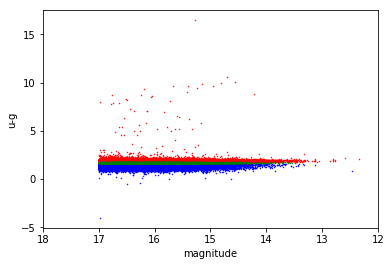

In [112]:
#the red-color against the magnitude

plt.scatter(blue['mag'], blue['red_color'],  s=1, marker = '.', color = 'Blue')
plt.scatter(red['mag'], red['red_color'],  s=1, marker = '.', color = 'Red')
plt.scatter(green['mag'], green['red_color'],  s=1, marker = '.', color = 'Green')
plt.xlim(18, 12)
plt.xlabel('magnitude')
plt.ylabel('u-g')


(18, 12)

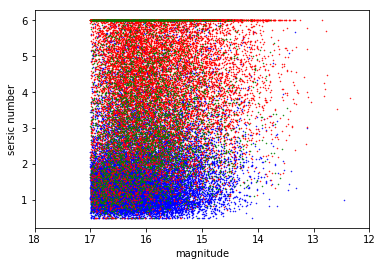

In [103]:
#light distribution(sersic number) versus the magnitude

plt.scatter(blue['mag'], blue['sersic_n'],  s=1, marker = '.', color = 'Blue')
plt.scatter(red['mag'], red['sersic_n'],  s=1, marker = '.', color = 'Red')
plt.scatter(green['mag'], green['sersic_n'],  s=1, marker = '.', color = 'Green')
plt.xlabel('magnitude')
plt.ylabel('sersic number')
plt.xlim(18, 12)

(18, 12)

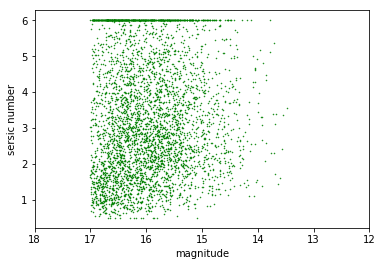

In [104]:
plt.scatter(green['mag'], green['sersic_n'],  s=1, marker = '.', color = 'Green')
plt.xlabel('magnitude')
plt.ylabel('sersic number')
plt.xlim(18, 12)

(18, 12)

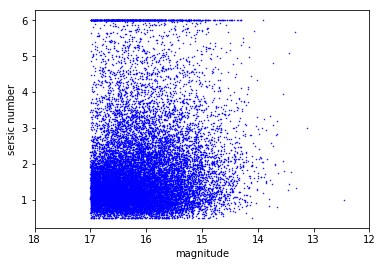

In [115]:
plt.scatter(blue['mag'], blue['sersic_n'],  s=1, marker = '.', color = 'Blue')
plt.xlabel('magnitude')
plt.ylabel('sersic number')
plt.xlim(18, 12)

(18, 12)

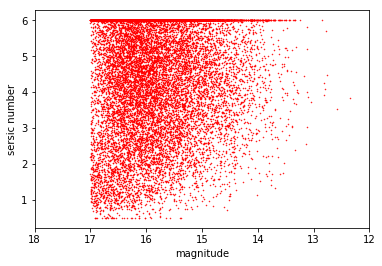

In [116]:
plt.scatter(red['mag'], red['sersic_n'],  s=1, marker = '.', color = 'Red')
plt.xlabel('magnitude')
plt.ylabel('sersic number')
plt.xlim(18, 12)

Text(0, 0.5, 'dec')

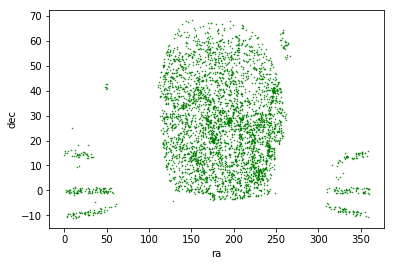

In [113]:
plt.scatter(green['ra'], green['dec'],  s=1, marker = '.', color = 'Green')
plt.xlabel('ra')
plt.ylabel('dec')

Text(0, 0.5, 'dec')

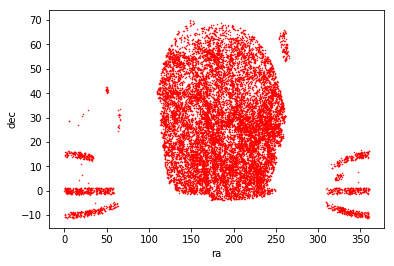

In [106]:

plt.scatter(red['ra'], red['dec'],  s=1, marker = '.', color = 'Red')
plt.xlabel('ra')
plt.ylabel('dec')

Getting image 1 of 16...
Getting image 2 of 16...
Getting image 3 of 16...
Getting image 4 of 16...
Getting image 5 of 16...
Getting image 6 of 16...
Getting image 7 of 16...
Getting image 8 of 16...
Getting image 9 of 16...
Getting image 10 of 16...
Getting image 11 of 16...
Getting image 12 of 16...
Getting image 13 of 16...
Getting image 14 of 16...
Getting image 15 of 16...
Getting image 16 of 16...
Plotting images...


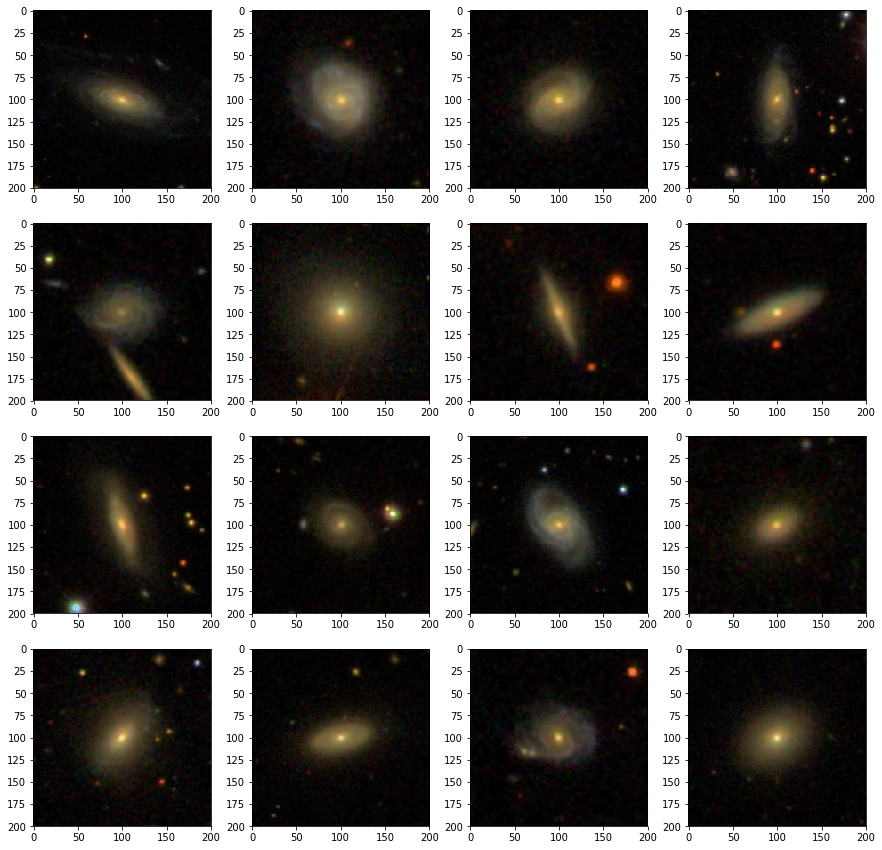

In [114]:
#plot galaxies that are the most inbetween red and blue
width=200           # image width
height=200          # height
pixelsize=0.396     # image scale
plt.figure(figsize=(15, 15))   # display in a 4x4 grid
subPlotNum = 1

#my_galaxies = np.where(green)[0]

i = 0
nGalaxies = 16 #Total number of galaxies to plot
ind = np.random.randint(0,len(green), nGalaxies) #randomly selected rows
count=0
for i in ind:           # iterate through the randomly selected rows in the DataFrame
    count=count+1
    print('Getting image '+str(count)+' of '+str(nGalaxies)+'...')
    if (count == nGalaxies):
        print('Plotting images...')
    scale=2*green.loc[i]['petror90_r']/pixelsize/width
    img = SkyServer.getJpegImgCutout(ra=green.loc[i]['ra'], dec=green.loc[i]['dec'], width=width, height=height, scale=scale,dataRelease='DR14')
    plt.subplot(4,4,subPlotNum)
    subPlotNum += 1
    plt.imshow(img)                               # show images in grid
    #plt.title(green[i]['z'])  



Getting image 1 of 16...
Getting image 2 of 16...
Getting image 3 of 16...
Getting image 4 of 16...
Getting image 5 of 16...
Getting image 6 of 16...
Getting image 7 of 16...
Getting image 8 of 16...
Getting image 9 of 16...
Getting image 10 of 16...
Getting image 11 of 16...
Getting image 12 of 16...
Getting image 13 of 16...
Getting image 14 of 16...
Getting image 15 of 16...
Getting image 16 of 16...
Plotting images...


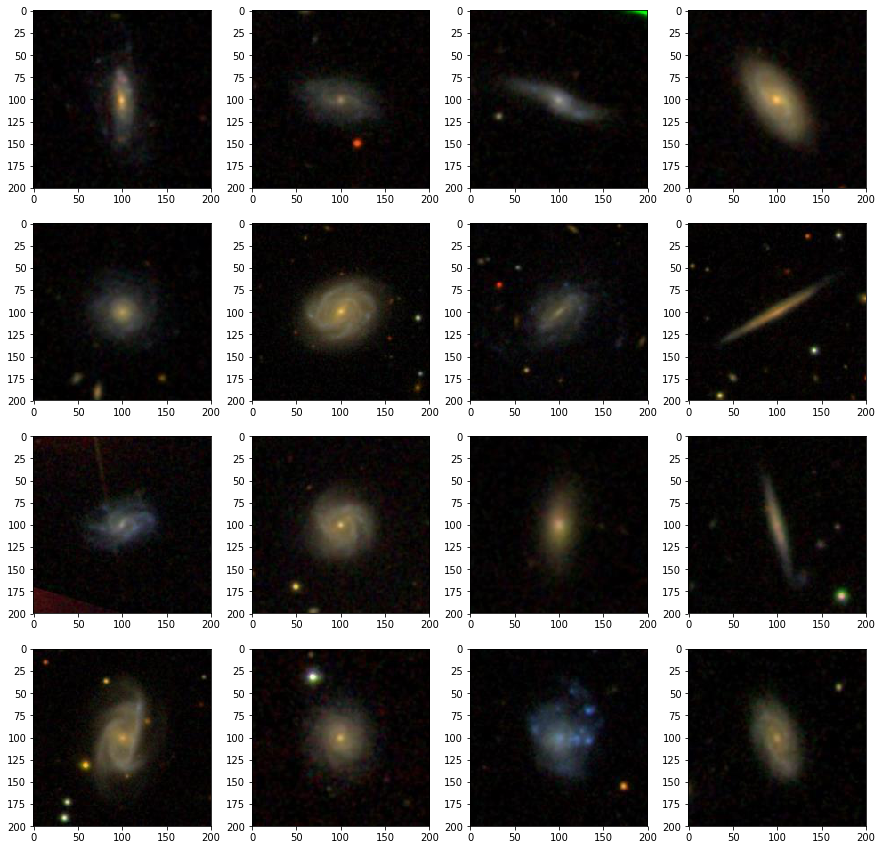

In [117]:
#plot bluer galaxies
width=200           # image width
height=200          # height
pixelsize=0.396     # image scale
plt.figure(figsize=(15, 15))   # display in a 4x4 grid
subPlotNum = 1

#my_galaxies = np.where(green)[0]

i = 0
nGalaxies = 16 #Total number of galaxies to plot
ind = np.random.randint(0,len(green), nGalaxies) #randomly selected rows
count=0
for i in ind:           # iterate through the randomly selected rows in the DataFrame
    count=count+1
    print('Getting image '+str(count)+' of '+str(nGalaxies)+'...')
    if (count == nGalaxies):
        print('Plotting images...')
    scale=2*blue.loc[i]['petror90_r']/pixelsize/width
    img = SkyServer.getJpegImgCutout(ra=blue.loc[i]['ra'], dec=blue.loc[i]['dec'], width=width, height=height, scale=scale,dataRelease='DR14')
    plt.subplot(4,4,subPlotNum)
    subPlotNum += 1
    plt.imshow(img)                               # show images in grid
    #plt.title(green[i]['z'])  



Getting image 1 of 16...
Getting image 2 of 16...
Getting image 3 of 16...
Getting image 4 of 16...
Getting image 5 of 16...
Getting image 6 of 16...
Getting image 7 of 16...
Getting image 8 of 16...
Getting image 9 of 16...
Getting image 10 of 16...
Getting image 11 of 16...
Getting image 12 of 16...
Getting image 13 of 16...
Getting image 14 of 16...
Getting image 15 of 16...
Getting image 16 of 16...
Plotting images...


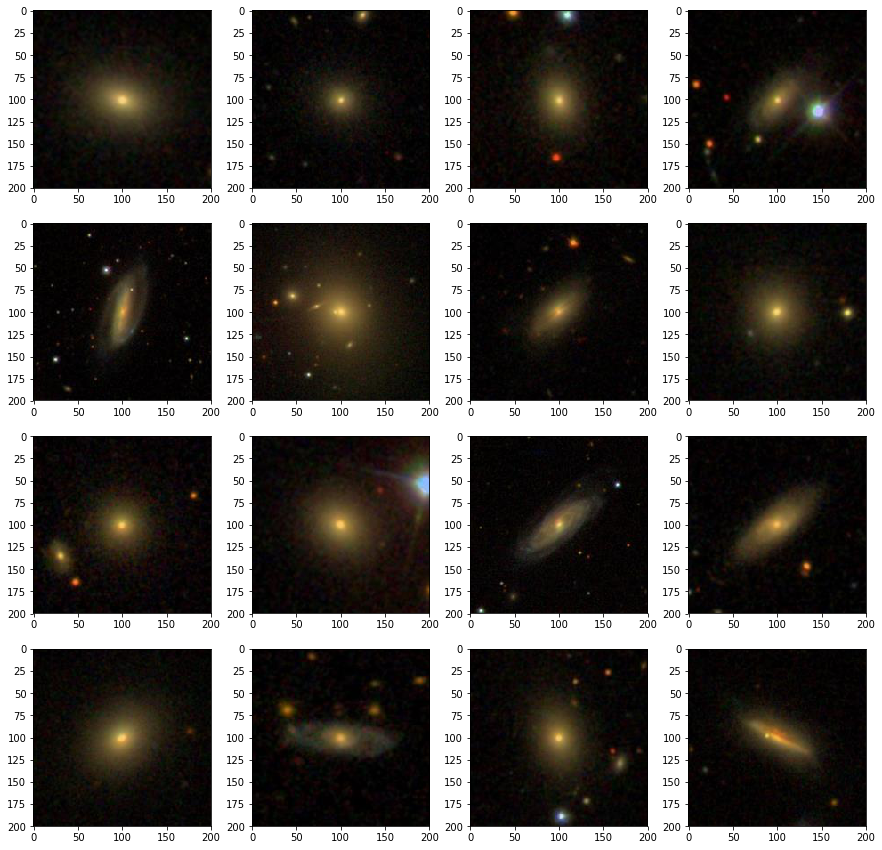

In [118]:
#plot redder galaxies
width=200           # image width
height=200          # height
pixelsize=0.396     # image scale
plt.figure(figsize=(15, 15))   # display in a 4x4 grid
subPlotNum = 1

#my_galaxies = np.where(green)[0]

i = 0
nGalaxies = 16 #Total number of galaxies to plot
ind = np.random.randint(0,len(green), nGalaxies) #randomly selected rows
count=0
for i in ind:           # iterate through the randomly selected rows in the DataFrame
    count=count+1
    print('Getting image '+str(count)+' of '+str(nGalaxies)+'...')
    if (count == nGalaxies):
        print('Plotting images...')
    scale=2*red.loc[i]['petror90_r']/pixelsize/width
    img = SkyServer.getJpegImgCutout(ra=red.loc[i]['ra'], dec=red.loc[i]['dec'], width=width, height=height, scale=scale,dataRelease='DR14')
    plt.subplot(4,4,subPlotNum)
    subPlotNum += 1
    plt.imshow(img)                               # show images in grid
    #plt.title(green[i]['z'])  

